In [3]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [4]:
from mlxtend.preprocessing import minmax_scaling

ModuleNotFoundError: No module named 'mlxtend'

In [5]:
pip install mlxtend


     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ----- ---------------------------------- 0.2/1.4 MB 5.6 MB/s eta 0:00:01
     ------------ --------------------------- 0.4/1.4 MB 5.1 MB/s eta 0:00:01
     --------------------------- ------------ 0.9/1.4 MB 8.4 MB/s eta 0:00:01
     ---------------------------------------  1.4/1.4 MB 8.6 MB/s eta 0:00:01
     ---------------------------------------  1.4/1.4 MB 8.6 MB/s eta 0:00:01
     ---------------------------------------  1.4/1.4 MB 8.6 MB/s eta 0:00:01
     ---------------------------------------- 1.4/1.4 MB 5.4 MB/s eta 0:00:00


In [6]:
from mlxtend.preprocessing import minmax_scaling

In [8]:
df=pd.read_csv('C:/Users/Hello/Documents/Amazon Sale Report.csv')
df.sample(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
70830,70830,171-7621922-4058723,05-14-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0003,J0003-SET-L,Set,...,INR,696.0,VISAKHAPATNAM,ANDHRA PRADESH,530044.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
54934,54934,171-2064618-7679527,05-27-22,Shipped,Amazon,Amazon.in,Expedited,JNE3068,JNE3068-KR-A-XL,kurta,...,INR,696.0,Amethi,UTTAR PRADESH,227817.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
6028,6028,407-6202833-5273938,04-26-22,Cancelled,Merchant,Amazon.in,Standard,JNE3365,JNE3365-KR-1052-A-M,kurta,...,INR,358.1,ENKAKKAD,KERALA,680589.0,IN,NaN,False,Easy Ship,NaN
108198,108198,402-0186719-4386731,06-15-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XXL,Set,...,INR,1137.0,SIRSA,HARYANA,125055.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
110639,110639,402-7760636-6984302,06-13-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-A-S,Western Dress,...,INR,725.0,HYDERABAD,TELANGANA,500049.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [9]:
df = df.drop(labels = ['index' , 'Order ID', 'Unnamed: 22', 'ship-postal-code', 'promotion-ids'], axis = 1)

In [10]:
df.isnull().sum()

Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-country             33
B2B                       0
fulfilled-by          89698
dtype: int64

In [11]:
df=df.fillna(method = 'bfill', axis=0)

In [12]:
df.isnull().sum()

Date                   0
Status                 0
Fulfilment             0
Sales Channel          0
ship-service-level     0
Style                  0
SKU                    0
Category               0
Size                   0
ASIN                   0
Courier Status         0
Qty                    0
currency               0
Amount                 0
ship-city              0
ship-state             0
ship-country           0
B2B                    0
fulfilled-by          83
dtype: int64

In [13]:
df=df.fillna(0)

In [14]:
df.dtypes

Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-country           object
B2B                      bool
fulfilled-by           object
dtype: object

In [15]:
for col in df.columns:
    print("Column:",col, "\n\n", df[col].value_counts(),"\n")

Column: Date 

 Date
05-03-22    2085
05-02-22    2079
05-04-22    2015
04-14-22    1883
04-15-22    1853
            ... 
06-23-22    1090
06-24-22    1028
06-25-22    1026
06-29-22     658
03-31-22     171
Name: count, Length: 91, dtype: int64 

Column: Status 

 Status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64 

Column: Fulfilment 

 Fulfilment
Amazon      89698
Merchant    39277
Name: count, dtype: int64 

Column: Sales Channel  

 Sales Channel 
Amazon.in     128851
Non-Amazon       124
Name: count,

         Amount  Qty
0        647.62    0
1        406.00    1
2        329.00    1
3        753.33    0
4        574.00    1
...         ...  ...
128970   517.00    1
128971   999.00    1
128972   690.00    1
128973  1199.00    1
128974   696.00    1

[128975 rows x 2 columns]
Amount


<Figure size 800x500 with 0 Axes>

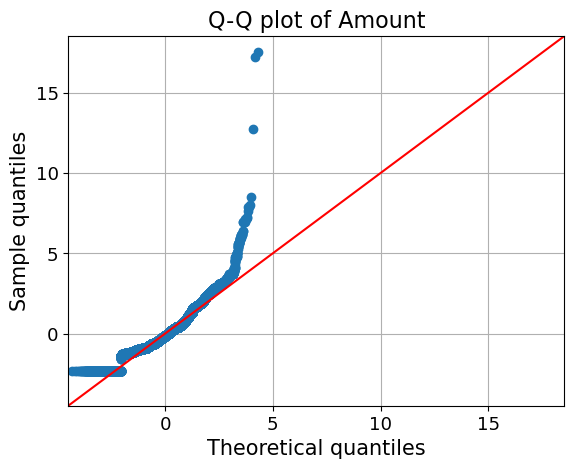

Qty


<Figure size 800x500 with 0 Axes>

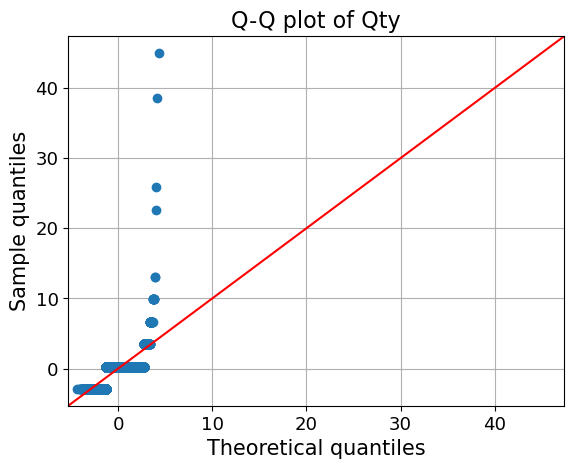

In [16]:
from statsmodels.graphics.gofplots import qqplot
data_norm=df[['Amount','Qty']]
print(data_norm)
for c in data_norm.columns[:]:
    print(c)
    plt.figure(figsize=(8,5))
    fig=qqplot(data_norm[c],line='45',fit='True')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles",fontsize=15)
    plt.ylabel("Sample quantiles",fontsize=15)
    plt.title("Q-Q plot of {}".format(c),fontsize=16)
    plt.grid(True)
    plt.show()


In [17]:
scaled_data = minmax_scaling(df['Qty'], columns = [0])
fig, ax=plt.subplots(1,2)
sns.distplot(df['Qty'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

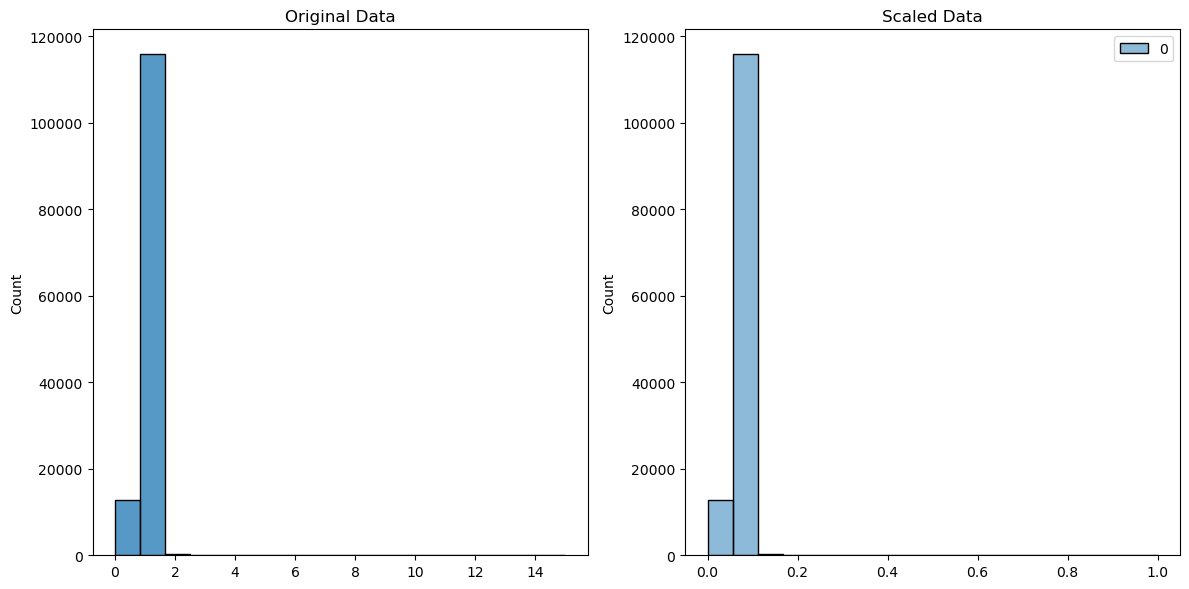

In [18]:
qty_array = df['Qty'].values  

scaled_data = minmax_scaling(qty_array, columns=[0])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(qty_array, ax=ax[0])
ax[0].set_title("Original Data")

sns.histplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled Data")

plt.tight_layout()
plt.show()

In [19]:
scaled_data = minmax_scaling(df['Amount'], columns = [0])
fig, ax=plt.subplots(1,2)
sns.distplot(df['Amount'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

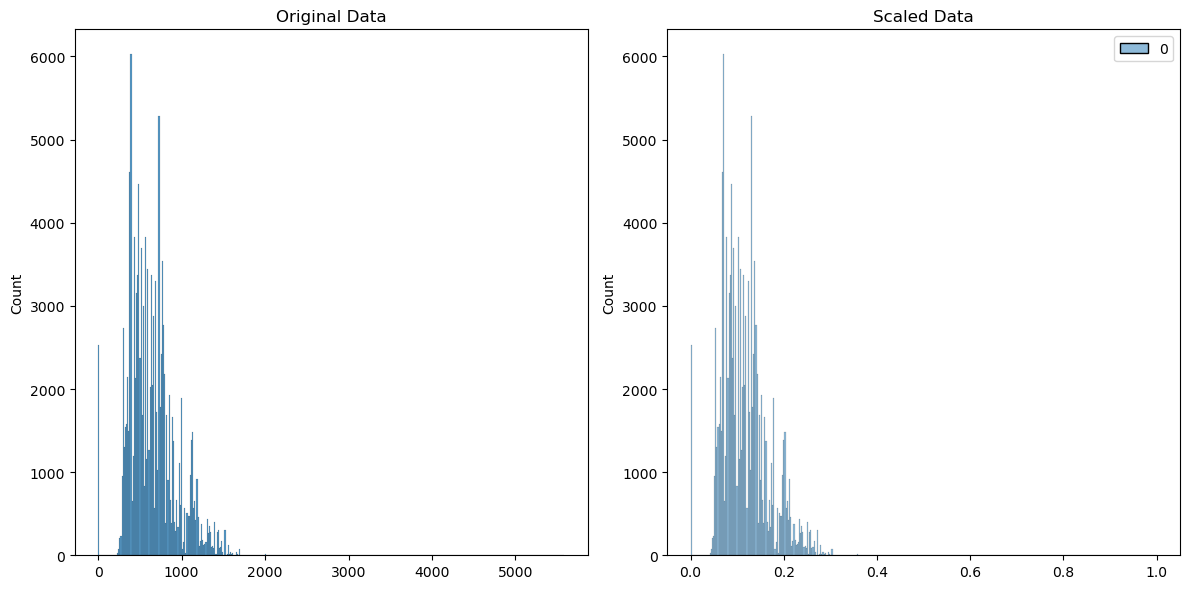

In [20]:
amount_array = df['Amount'].values

scaled_data = minmax_scaling(amount_array, columns=[0])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(amount_array, ax=ax[0])
ax[0].set_title("Original Data")

sns.histplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled Data")

plt.tight_layout()
plt.show()

In [21]:
df[['Qty','Amount']].groupby(df['Fulfilment']).mean()

,Qty,Amount
Fulfilment,,
Amazon,0.937446,649.273232
Merchant,0.829035,646.859903


In [22]:
df['Amount'].groupby(df['Fulfilment']).sum()

Fulfilment
Amazon      58238510.40
Merchant    25406716.41
Name: Amount, dtype: float64

In [23]:
df['Amount'].groupby(df['Category']).count()

Category
Blouse             926
Bottom             440
Dupatta              3
Ethnic Dress      1159
Saree              164
Set              50284
Top              10622
Western Dress    15500
kurta            49877
Name: Amount, dtype: int64

In [24]:
df['Amount'].groupby(df['Status']).max()

Status
Cancelled                        4235.72
Pending                          1672.00
Pending - Waiting for Pick Up    2326.00
Shipped                          5584.00
Shipped - Damaged                1136.00
Shipped - Delivered to Buyer     5495.00
Shipped - Lost in Transit         999.00
Shipped - Out for Delivery       1399.00
Shipped - Picked Up              1998.00
Shipped - Rejected by Buyer       967.00
Shipped - Returned to Seller     2796.00
Shipped - Returning to Seller    1976.00
Shipping                          999.00
Name: Amount, dtype: float64

In [25]:
a = df.groupby(['ship-state', 'ship-city'])
a.mean()

TypeError: Could not convert 05-15-22 to numeric

In [27]:
numeric_cols = ['Qty', 'Amount'] 
a = df.groupby(['ship-state', 'ship-city'])[numeric_cols].mean()


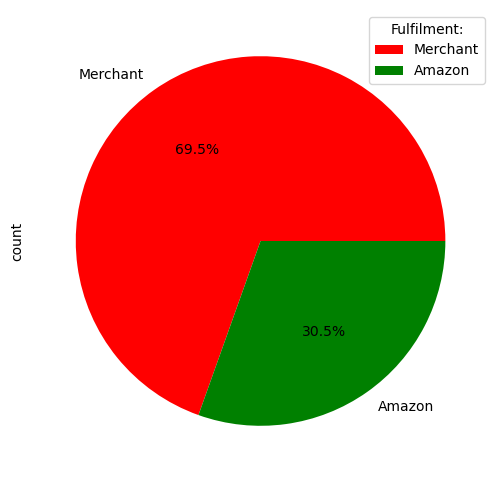

In [28]:
plt.figure(1, figsize=(6,6))
df['Fulfilment'].value_counts().plot.pie(autopct="%1.1f%%",colors = ( "r", "g"),labels = df['Fulfilment'].unique(), shadow = False)
plt.legend(title = "Fulfilment:")
plt.show()

<Axes: xlabel='Courier Status', ylabel='count'>

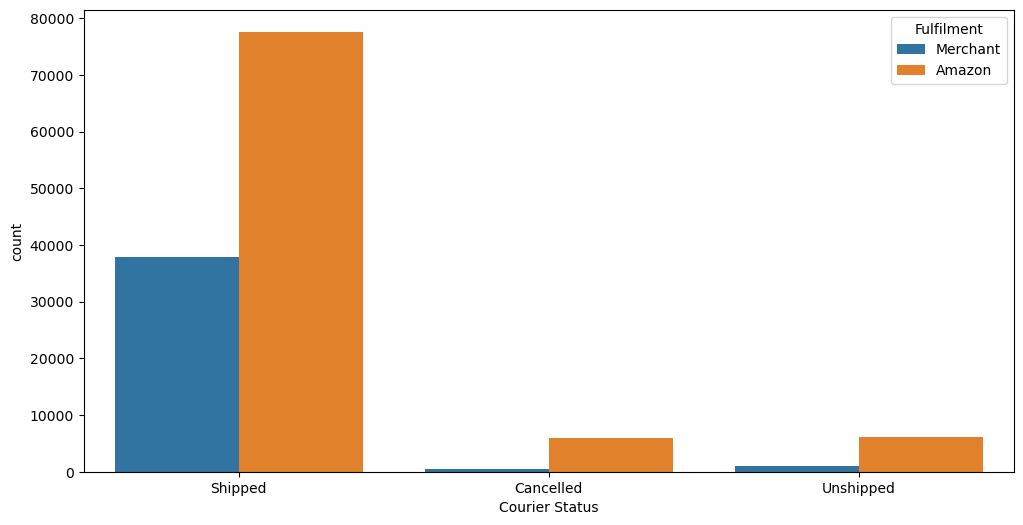

In [29]:
plt.figure(figsize = (12, 6))

sns.countplot(x = 'Courier Status', hue = 'Fulfilment', data = df)

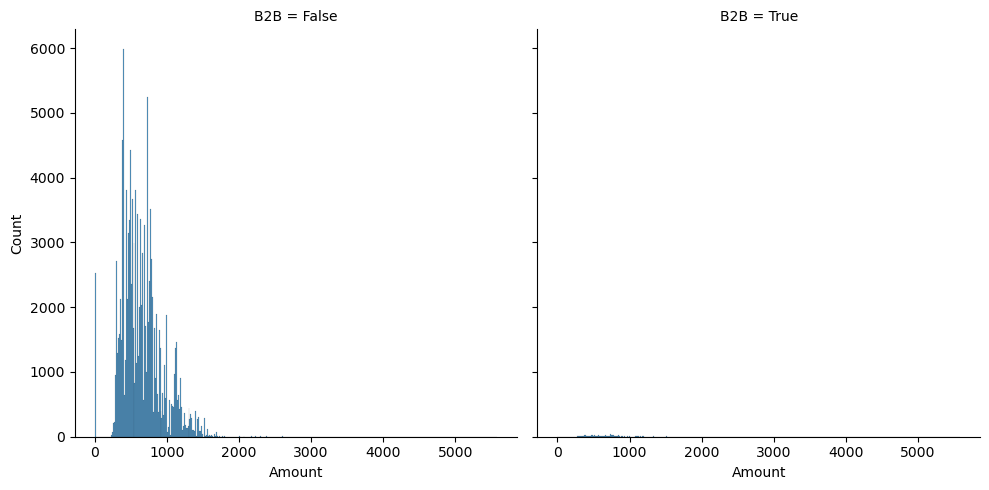

In [30]:
sns.displot(data = df, x = 'Amount', col = 'B2B');

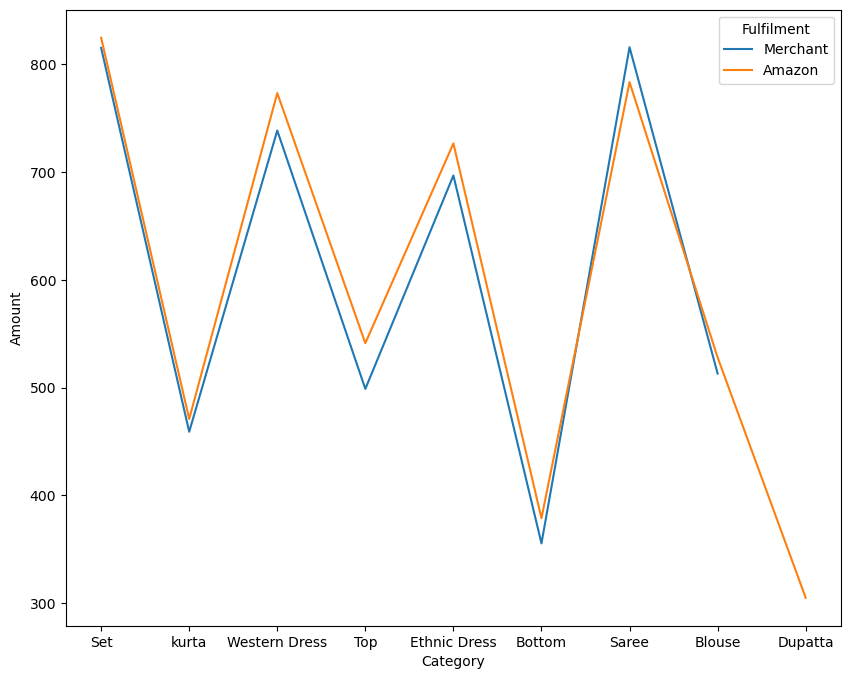

In [31]:
plt.figure(figsize = (10, 8))

sns.lineplot(x = 'Category', y = 'Amount', hue = 'Fulfilment', ci = None,
             estimator = 'mean', data = df);